In [1]:
#Import Libraries for diabetes model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
#from skLearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [2]:
#index_col="insulin"
column_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
data_set=pd.read_csv("C:\\Users\\DELL\\pima-indians-diabetes.csv", header=None, names=column_names, skiprows=(0,0))

In [3]:
data_set.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
#data_frame.dtypes
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  767 non-null    int64  
 1   glucose   767 non-null    int64  
 2   bp        767 non-null    int64  
 3   skin      767 non-null    int64  
 4   insulin   767 non-null    int64  
 5   bmi       767 non-null    float64
 6   pedigree  767 non-null    float64
 7   age       767 non-null    int64  
 8   label     767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#data_frame.describe
data_set.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#conversion of string into numeric
convert_col=['pregnant','insulin','bmi','age','glucose','bp','pedigree']
for col in convert_col: # Iterate over chosen columns
    data_set[col]=pd.to_numeric(data_set[col])

In [8]:
#feature selection
features_Columns=['pregnant','insulin','bmi','age','glucose','bp','pedigree']
X=data_set[features_Columns]
y=data_set.label
#X.describe()

Text(0.5, 249.0, 'Feature Values on X axis')

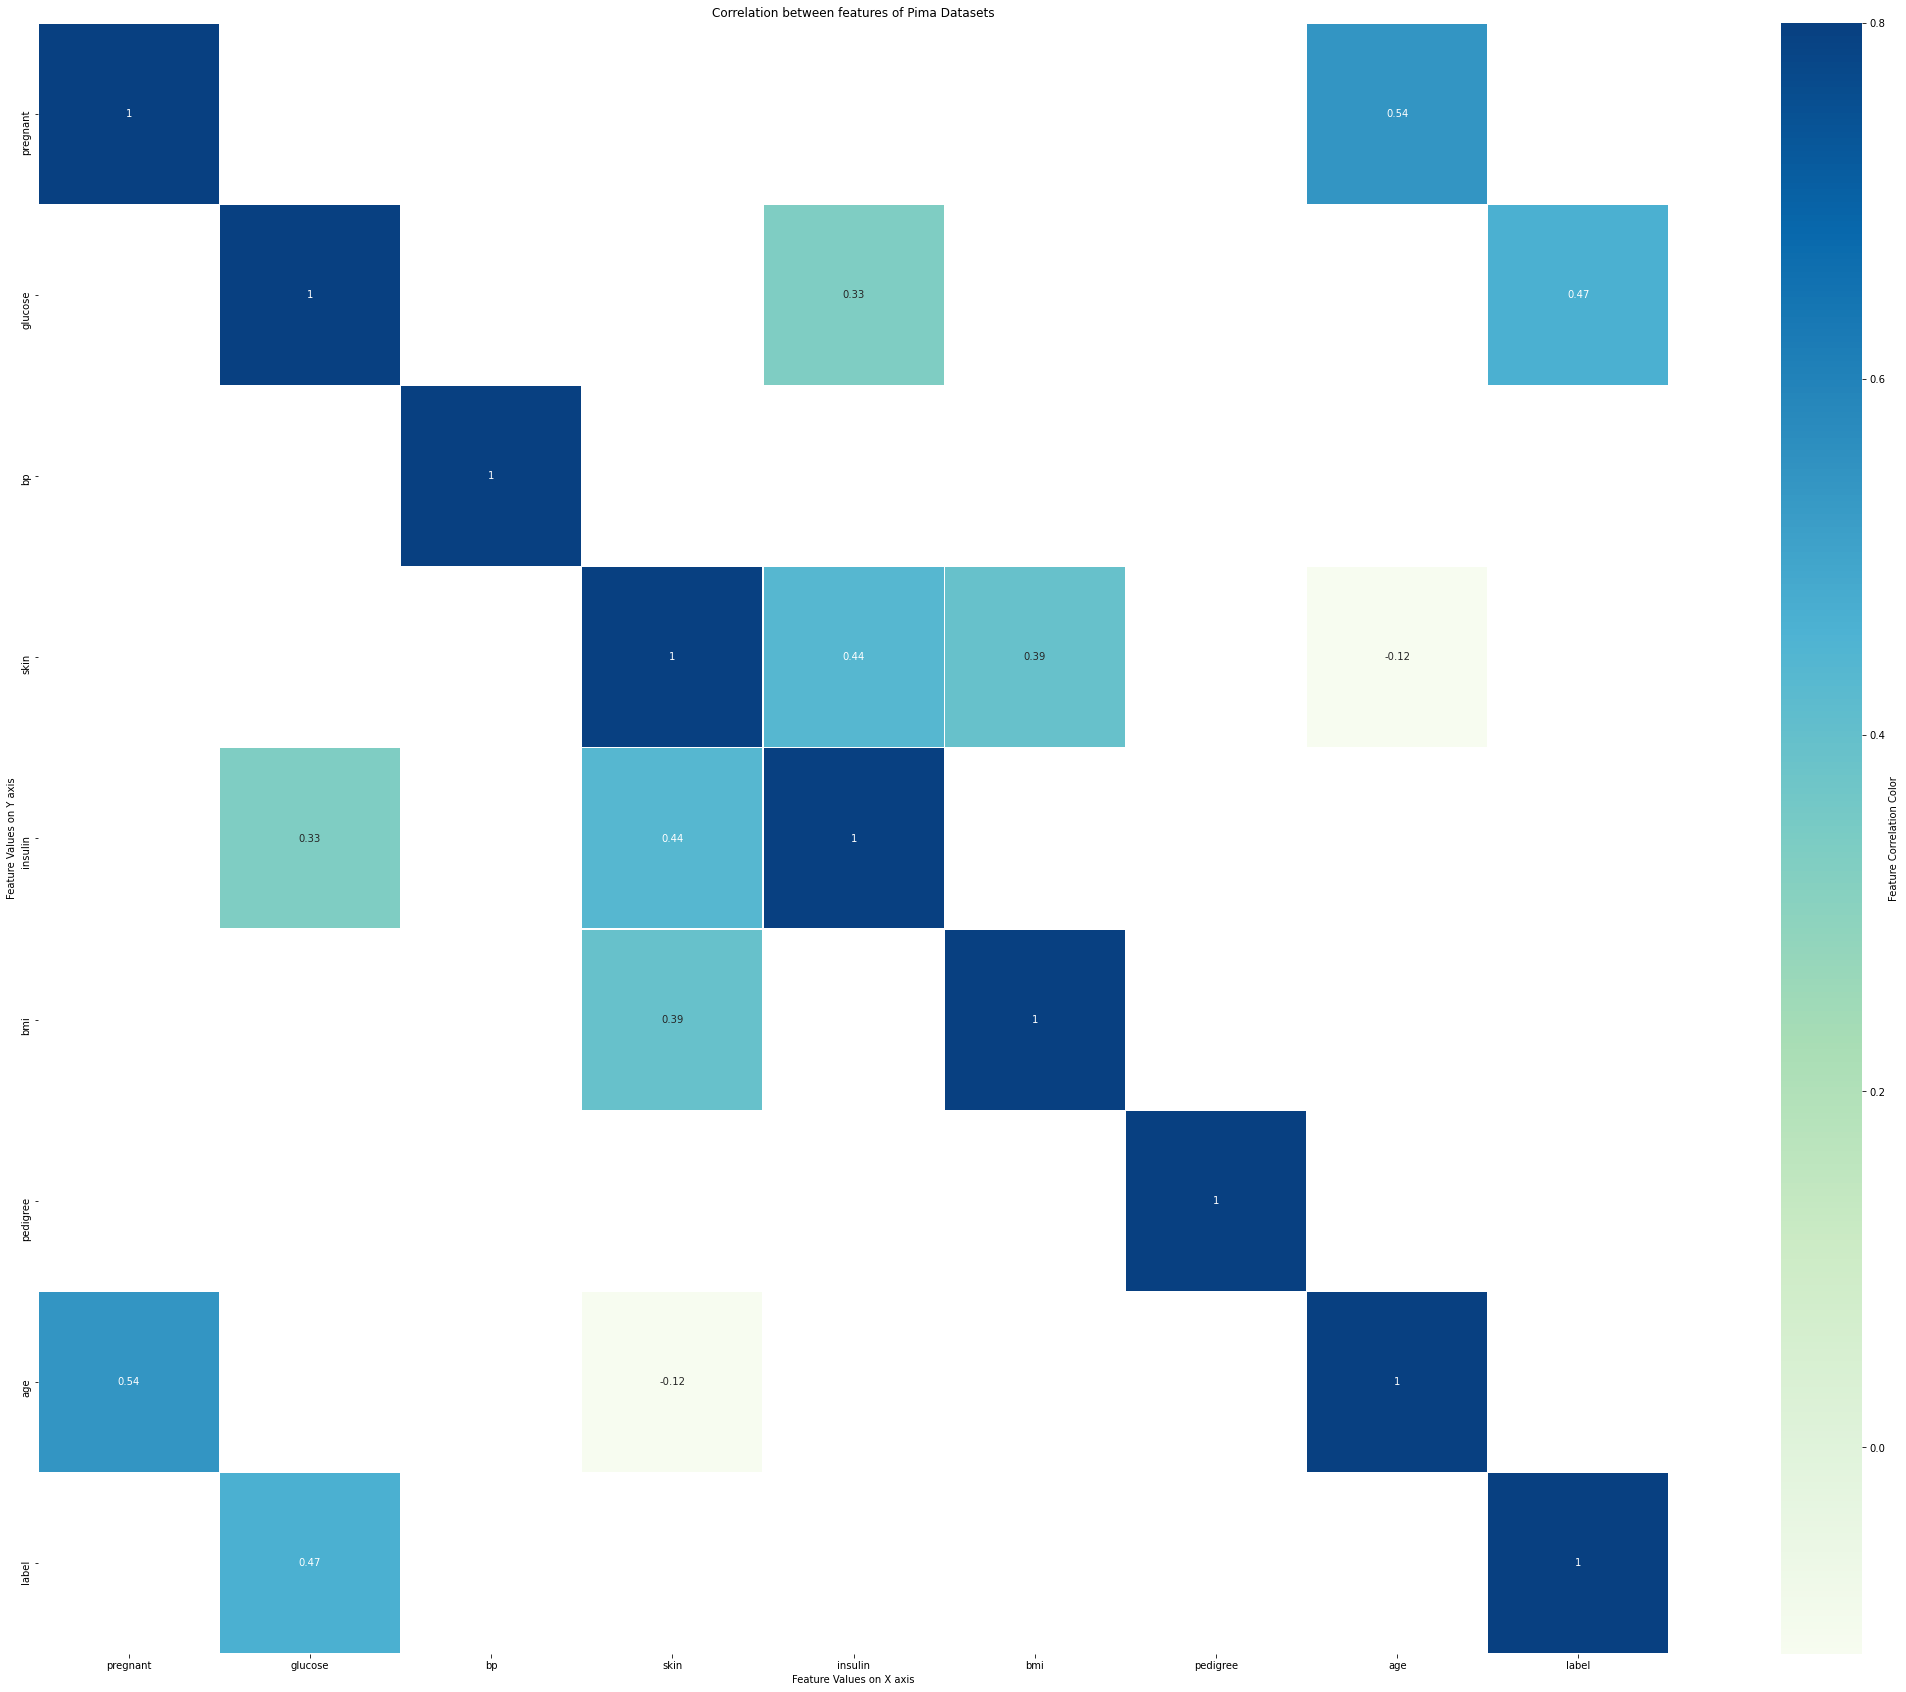

In [9]:
corr=data_set.corr()
plt.figure(figsize=(40,30))
coor_range=corr[(corr>=0.3)|(corr<=-0.1)]
sns.heatmap( coor_range,vmax=.8, linewidths=0.01,square=True,annot=True,cmap='GnBu',linecolor="white", cbar_kws={'label':'Feature Correlation Color'})
plt.title('Correlation between features of Pima Datasets')
plt.ylabel("Feature Values on Y axis")
plt.xlabel("Feature Values on X axis")
#corr[np.abs(coor_range)<.2]=0

In [10]:
#splitting dataset into test and training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [11]:
#applying logistic regression algorithm
logistic_function=LogisticRegression()

In [12]:
#Fit model with training data
logistic_function.fit(X_train,y_train)
y_prediction=logistic_function.predict(X_test)

In [13]:
#Model evaluation using confusion matrix for the performance of classification model
from sklearn import metrics

cnf_matrix_evaluation=metrics.confusion_matrix(y_test,y_prediction)
cnf_matrix_evaluation

array([[87, 10],
       [19, 38]], dtype=int64)

In [14]:
#Visualization of confusion matrix using heatmap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

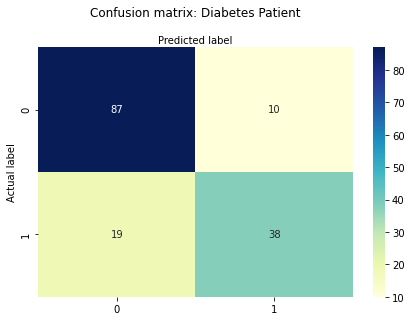

In [15]:
class_names= [0,1] #naming the classes
fig, ax= plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#creating heatmap for getting conf. matrix
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: Diabetes Patient',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
#confusion matrix conclusion for evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_prediction))
print("Precision:",metrics.precision_score(y_test,y_prediction))
print("Recall:",metrics.recall_score(y_test,y_prediction))
print(metrics.accuracy_score(y_test,y_prediction)*100, "%:","chances that person having diabetes in the present dataset")
print(y_prediction)

Accuracy: 0.8116883116883117
Precision: 0.7916666666666666
Recall: 0.6666666666666666
81.16883116883116 %: chances that person having diabetes in the present dataset
[0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1
 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 0]


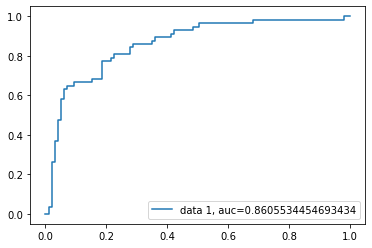

In [18]:
y_prediction_probability=logistic_function.predict_proba(X_test)[::,1]
fpr,tpr, _=metrics.roc_curve(y_test, y_prediction_probability)
auc= metrics.roc_auc_score(y_test, y_prediction_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [19]:
from sklearn.metrics import f1_score

In [20]:
f1_score(y_test,y_prediction,average=None)

array([0.85714286, 0.72380952])